In [1]:
using Plots, DelimitedFiles, LaTeXStrings, Statistics, LinearAlgebra, Chemfiles, DataFrames
pyplot()

home = "/home/pbarletta/labo/18/lbp/run"
rtdos = "/home/pbarletta/labo/18/lbp/rtdos_log"
pdbs = "/home/pbarletta/labo/18/lbp/top_files/originales_pdbs"

"/home/pbarletta/labo/18/lbp/top_files/originales_pdbs"

In [2]:
function read_rmsf(pdb)
    fname = joinpath(home, pdb, "rmsf", string("rmsf_", pdb))
    rmsf_ = Symbol("rmsf_", pdb)
    ex = :(($rmsf_, header) = readdlm($fname, header = true))
    eval(ex)
end

function get_sse(location, pdb)
    helices = Array{UnitRange{Int64}, 1}()
    sheets = Array{UnitRange{Int64}, 1}()

    open(joinpath(location, string(pdb, ".pdb"))) do f
        while !eof(f)
            ln = readline(f)
            if ln[1:5] == "HELIX"
                found_helix = true
                push!(helices, UnitRange{Int64}(
                        parse(Int64, ln[22:25]), parse(Int64, ln[34:37])) )
            elseif ln[1:5] == "SHEET"
                found_sheet = true
                push!(sheets, UnitRange{Int64}(
                        parse(Int64, ln[23:26]), parse(Int64, ln[34:37])) )
            elseif ln[1:4] == "ATOM"
                break
            end
        end
    end
    
    return helices, sheets
end

function get_sse_wrapper(path, pdb)
    helices_ = Symbol("helices_", pdb)
    sheets_ = Symbol("sheets_", pdb)
    
    ex = :(($helices_, $sheets_) = get_sse($path, $pdb))
    eval(ex)
end

function plot_sse(rango, h, nombre, color, sse_id::String = "")
    sse = collect(rango)
    plot!(sse, fill(h, length(sse)),
        linewidth = 5, label = nombre, linecolor = color, line = :solid)

    if(sse_id != "")
        annotate!(mean(rango), h+.1, text(sse_id, "black", 13))        
    end
end

function scatter_sse(rango, h, nombre, color, sse_id::String = "")
    sse = collect(rango)
    scatter!(sse, fill(h, length(sse)),
        markersize = 1, label = nombre, fillcolor = color, line = :solid)
    
    if(sse_id != "")
        annotate!(mean(rango), h+.1, text(sse_id, "black", 13))        
    end
end

scatter_sse (generic function with 2 methods)

### get data

In [3]:
read_rmsf("1ifb")
read_rmsf("2ifb")
read_rmsf("4uet")
read_rmsf("4xcp")

read_rmsf("wat1ifb")

get_sse_wrapper(pdbs, "1ifb")
get_sse_wrapper(pdbs, "2ifb")
get_sse_wrapper(pdbs, "4uet")
get_sse_wrapper(pdbs, "4xcp")

rango_ifb = 7:126
rango_4 = 10:144

10:144

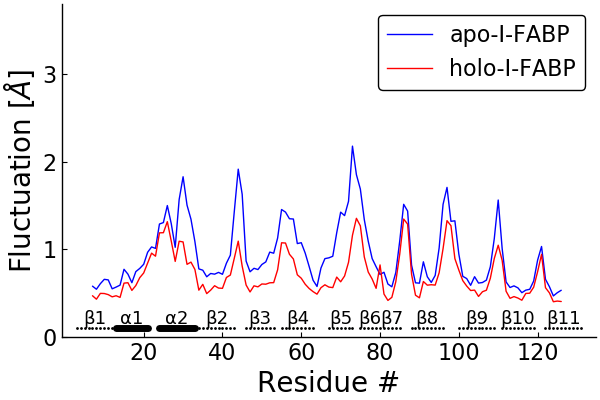

In [59]:
plt_rmsf_beta = plot(rango_ifb, rmsf_1ifb[:, 2],
    ylims = (0, 3.8), xticks = 20:20:120,
    linecolor = Colors.colorant"#0000FF",
    grid = false, label = "apo-I-FABP",
    guidefont = font(20, "Arial"), tickfont = font(16, "Arial"),
    legendfont = font(16, "Arial"),
    yaxis = L"Fluctuation $[\AA]$", xaxis = "Residue #")

plot!(rango_ifb, rmsf_2ifb[:, 2],
    linecolor = Colors.colorant"#FF0000", label = "holo-I-FABP")

for i in 1:length(helices_1ifb)
   plot_sse(helices_1ifb[i], 0.1, "", Colors.colorant"#000000", string("α", i))
end

for i in 1:length(sheets_1ifb)
   scatter_sse(sheets_1ifb[i], 0.1, "", Colors.colorant"#000000", string("β", i))
end

plt_rmsf_beta

In [46]:
savefig(plt_rmsf_beta, joinpath(rtdos, "papel", "SI", string("rmsf_1ifb_2ifb.svg")))

In [5]:
hcat([ mean(rmsf_1ifb[:, 2]), mean(rmsf_2ifb[:, 2])], [ std(rmsf_1ifb[:, 2]), std(rmsf_2ifb[:, 2]) ])

2×2 Array{Float64,2}:
 0.94475   0.372736
 0.704536  0.24767 

In [5]:
helices_4uet

11-element Array{UnitRange{Int64},1}:
 2:6    
 7:12   
 16:25  
 26:40  
 44:56  
 56:76  
 78:98  
 106:122
 125:136
 136:145
 148:153

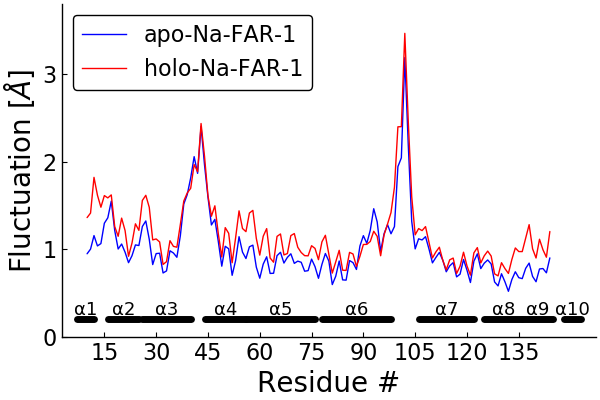

In [9]:
plt_rmsf_alfa = plot(rango_4, rmsf_4uet[:, 2],
    ylims = (0, 3.8), xticks = 15:15:135,
    linecolor = Colors.colorant"#0000FF",
    grid = false, label = "apo-Na-FAR-1",
    guidefont = font(20, "Arial"), tickfont = font(16, "Arial"),
    legendfont = font(16, "Arial"),
    yaxis = L"Fluctuation $[\AA]$", xaxis = "Residue #")

plot!(rango_4, rmsf_4xcp[:, 2],
    linecolor = Colors.colorant"#FF0000", label = "holo-Na-FAR-1")

# Me salteo la 1er hélice pq las autoras del paper anterior dicen q no es alfa sino 3_10
for i in 1:(length(helices_4uet)-1)
    plot_sse(helices_4uet[i+1], 0.2, "", Colors.colorant"#000000", string("α", i))
end

plt_rmsf_alfa

In [10]:
savefig(plt_rmsf_alfa, joinpath(rtdos, "papel", "SI", string("rmsf_4uet_4xcp.svg")))

In [7]:
hcat([ mean(rmsf_4uet[:, 2]), mean(rmsf_4xcp[:, 2])], [ std(rmsf_4uet[:, 2]), std(rmsf_4xcp[:, 2]) ])

2×2 Array{Float64,2}:
 1.01782  0.391093
 1.18255  0.408225

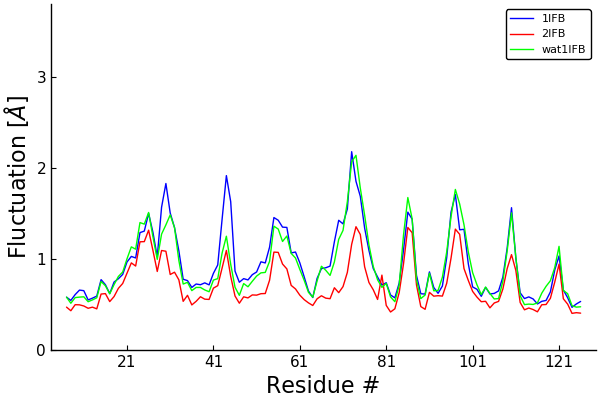

In [8]:
plt_rmsf_wat1ifb = plot(rango_ifb, rmsf_1ifb[:, 2],
    ylims = (0, 3.8), xticks = 1:20:121,
    linecolor = Colors.colorant"#0000FF",
    grid = false, label = "1IFB",
    guidefont = font(16, "Arial"), tickfont = font(11, "Arial"),
    yaxis = L"Fluctuation $[\AA]$", xaxis = "Residue #")

plot!(rango_ifb, rmsf_2ifb[:, 2],
    linecolor = Colors.colorant"#FF0000", label = "2IFB")

plot!(rango_ifb, rmsf_wat1ifb[:, 2],
    linecolor = Colors.colorant"#00FF00", label = "wat1IFB")

In [9]:
[ mean(rmsf_wat1ifb[:, 2]), std(rmsf_wat1ifb[:, 2]) ]

2-element Array{Float64,1}:
 0.9126933333333335 
 0.36288092260243654

In [146]:
savefig(plt_rmsf_alfa, joinpath(rtdos, "papel", "extra", string("rmsf_wat1ifb.svg")))

#### Residuos de > RMSF o distancia entre confórmeros

In [10]:
# Get list of residues names
trj_avg_4uet = Trajectory(joinpath(home, "4uet",  "ndd", "avg_4uet.pdb"))
frm_avg_4uet = read(trj_avg_4uet)
close(trj_avg_4uet)
top_avg_4uet = Topology(frm_avg_4uet)
res_4uet = [ name(Residue(top_avg_4uet, i)) for  i in 0:count_residues(top_avg_4uet)-1]

# Get RMSFs
idces_4uet = sortperm(rmsf_4uet[:, 2], rev = true)
DataFrame(RESN = idces_4uet, RESI = res_4uet[idces_4uet],
    RMSF = rmsf_4uet[idces_4uet, 2])[1:20, :]

,RESN,RESI,RMSF
,Int64,String,Float64
1,93,GLY,3.1868
2,34,LYS,2.4004
3,94,ASN,2.1901
4,32,PRO,2.0558
5,92,THR,2.0422
6,35,ASN,1.9623
7,91,TYR,1.9421
8,33,TYR,1.8651
9,31,GLY,1.8135


In [11]:
# Get list of residues names
trj_avg_4xcp = Trajectory(joinpath(home, "4xcp",  "ndd", "avg_4xcp.pdb"))
frm_avg_4xcp = read(trj_avg_4xcp)
close(trj_avg_4xcp)
top_avg_4xcp = Topology(frm_avg_4xcp)
res_4xcp = [ name(Residue(top_avg_4xcp, i)) for  i in 0:count_residues(top_avg_4xcp)-1]

# Get RMSFs
idces_4xcp = sortperm(rmsf_4xcp[:, 2], rev = true)
DataFrame(RESN = idces_4xcp, RESI = res_4xcp[idces_4xcp],
    RMSF = rmsf_4xcp[idces_4xcp, 2])[1:20, :]

,RESN,RESI,RMSF
,Int64,String,Float64
1,93,GLY,3.4641
2,94,ASN,2.4597
3,34,LYS,2.4344
4,92,THR,2.3984
5,91,TYR,2.3966
6,35,ASN,2.0607
7,32,PRO,1.9653
8,33,TYR,1.8846
9,3,ASP,1.8192


## Distancias

In [12]:
using Chemfiles, LinearAlgebra, CSV, DataFrames
rmsd_path = "/home/pbarletta/labo/18/lbp/rmsd"

function gte_ca(frm = Chemfiles::Frame)
    return convert(Array{Int64, 1}, evaluate(Selection("name CA"), frm)) .+ 1
end

gte_ca (generic function with 2 methods)

In [13]:
# Beta
trj_1ifb = Trajectory(joinpath(rmsd_path, string("avg_", "1ifb", ".pdb")))
frm_1ifb = read(trj_1ifb)
xyz_1ifb = positions(frm_1ifb)

trj_2ifb = Trajectory(joinpath(rmsd_path, string("avg_", "2ifb", ".pdb")))
frm_2ifb = read(trj_2ifb)
xyz_2ifb = positions(frm_2ifb)

# Alfa
trj_4uet = Trajectory(joinpath(rmsd_path, string("avg_", "4uet", ".pdb")))
frm_4uet = read(trj_4uet)
xyz_4uet = positions(frm_4uet)

trj_4xcp = Trajectory(joinpath(rmsd_path, string("avg_", "4xcp", ".pdb")))
frm_4xcp = read(trj_4xcp)
xyz_4xcp = positions(frm_4xcp)

ca_1ifb = gte_ca(frm_1ifb)
ca_2ifb = gte_ca(frm_2ifb)
pop!(ca_2ifb)
ca_4uet = gte_ca(frm_4uet)
ca_4xcp = gte_ca(frm_4xcp)
pop!(ca_4xcp)

d_beta = reshape(mapslices(x -> norm(x), 
            (xyz_2ifb[:, ca_2ifb] .- xyz_1ifb[:, ca_1ifb]), dims = 1), length(ca_1ifb))
d_alfa = reshape(mapslices(x -> norm(x),
            (xyz_4xcp[:, ca_4xcp] .- xyz_4uet[:, ca_4uet]), dims = 1), length(ca_4uet));

In [14]:
idx_d_beta = sortperm(d_beta, rev = true)
CSV.write(joinpath(rmsd_path, "idx_d_beta.csv"),
    DataFrame(resi = idx_d_beta, Distance = d_beta[idx_d_beta]))

idx_d_alfa = sortperm(d_alfa, rev = true)
CSV.write(joinpath(rmsd_path, "idx_d_alfa.csv"),
    DataFrame(resi = idx_d_alfa, Distance = d_alfa[idx_d_alfa]))

"/home/pbarletta/labo/18/lbp/rmsd/idx_d_alfa.csv"

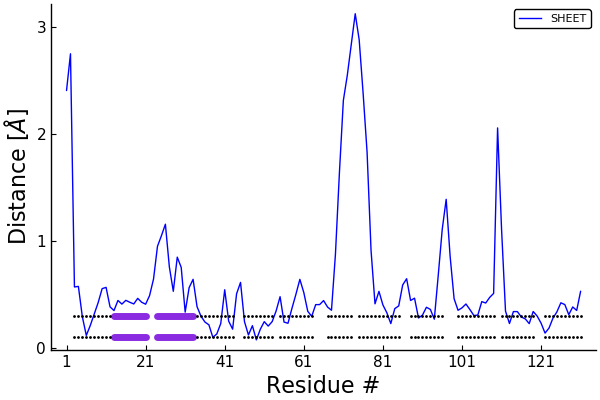

In [15]:
plt_d_beta = plot(d_beta,
#     ylims = (0, 4.5),
    xticks = 1:20:121,
    linecolor = Colors.colorant"#0000FF",
    grid = false, label = "SHEET",
    guidefont = font(16, "Arial"), tickfont = font(11, "Arial"),
    yaxis = L"Distance $[\AA]$", xaxis = "Residue #")

for each in helices_1ifb
   plot_sse(each, .3, "", Colors.colorant"#8A2BE2")
end

for each in sheets_1ifb
   scatter_sse(each, .3, "", Colors.colorant"#A52A2A")
end

for each in helices_2ifb
   plot_sse(each, 0.1, "", Colors.colorant"#8A2BE2")
end

for each in sheets_2ifb
   scatter_sse(each, 0.1, "", Colors.colorant"#A52A2A")
end

plt_d_beta

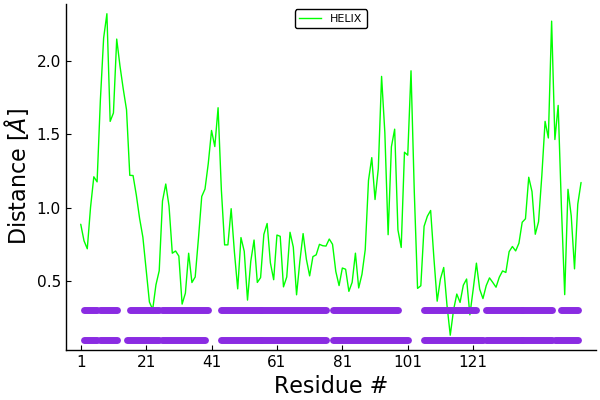

In [16]:
plt_d_beta = plot(d_alfa,
#     ylims = (0, 4.5),
    xticks = 1:20:121,
    linecolor = Colors.colorant"#00FF00",
    grid = false, label = "HELIX",
    guidefont = font(16, "Arial"), tickfont = font(11, "Arial"),
    yaxis = L"Distance $[\AA]$", xaxis = "Residue #")

for each in helices_4uet
   plot_sse(each, .3, "", Colors.colorant"#8A2BE2")
end

for each in sheets_4uet
   scatter_sse(each, .3, "", Colors.colorant"#A52A2A")
end

for each in helices_4xcp
   plot_sse(each, 0.1, "", Colors.colorant"#8A2BE2")
end

for each in sheets_4xcp
   scatter_sse(each, 0.1, "", Colors.colorant"#A52A2A")
end

plt_d_beta

## Check modos 1 y 2 de 4UET y 4XCP

In [13]:
function readPtrajModes(filename::AbstractString, nmodes::Int64 = 0,
    norma::Bool = true)
    modes_text = readdlm(filename, skipstart=0, skipblanks=true, comments=true,
        comment_char='*')

    if nmodes == 0
        nmodes = convert(Int64, modes_text[1, 5])
    end
    ncoords = convert(Int64, modes_text[2, 1])

    lines = ceil(Int64, ncoords/7)
    fields_per_line = lines * 7
    evalue = Array{Float64, 1}(undef, nmodes)
    mode = Array{Float64, 2}(undef, ncoords, nmodes)

    j = lines + 1 + 2 # 1 p/ q lea la prox linea 2 por el header
    for i=1:nmodes
        evalue[i] = modes_text[j, 2]
        temp = permutedims(modes_text[(j+1):(lines+j), :], [2, 1])
        temp2 = reshape(temp, fields_per_line)
        [ pop!(temp2) for k = ncoords+1:fields_per_line ]
        mode[:, i] = convert(Array{Float64, 1}, temp2)
        j = j + lines + 1
    end

    if norma
        [ mode[: ,i] = mode[:, i] ./ norm(mode[:, i]) for i=1:nmodes ]
    end

     return mode, evalue
end

function toGnm(vtor_anm::Array{Float64, 1})
    m = length(vtor_anm)
    n = Int64
    try
        n = convert(Int64, m/3)
    catch e
        error("Input vector's length is not divisible by 3.")
    end

    vtor_gnm = Array{Float64, 1}(undef, n);

    [ vtor_gnm[i] = sqrt(vtor_anm[i*3-2]^2 + vtor_anm[i*3-1]^2 + vtor_anm[i*3]^2)
        for i = 1:n ]

    return vtor_gnm
end


toGnm (generic function with 1 method)

In [10]:
modes_4uet, evals_4uet = readPtrajModes(joinpath(home, "4uet", "pca", "modes_4uet"))
modes_4xcp, evals_4xcp = readPtrajModes(joinpath(home, "4xcp", "pca", "modes_4xcp"));

In [16]:
uno_4xcp = toGnm(modes_4xcp[:, 1])
dos_4xcp = toGnm(modes_4xcp[:, 2])

uno_4uet = toGnm(modes_4uet[:, 1])
dos_4uet = toGnm(modes_4uet[:, 2]);

In [18]:
println(sortperm(uno_4xcp))

[121, 124, 123, 127, 122, 126, 88, 131, 120, 125, 68, 118, 69, 86, 119, 128, 132, 72, 117, 130, 135, 134, 55, 59, 64, 67, 105, 65, 108, 87, 133, 76, 83, 104, 14, 112, 73, 89, 79, 109, 129, 85, 70, 71, 116, 63, 75, 115, 13, 23, 62, 111, 66, 80, 43, 40, 101, 58, 107, 113, 106, 94, 110, 82, 77, 54, 74, 24, 114, 102, 100, 103, 10, 84, 78, 26, 5, 95, 93, 51, 96, 4, 81, 1, 99, 98, 9, 27, 60, 92, 2, 97, 61, 56, 91, 90, 6, 15, 22, 25, 57, 44, 50, 52, 12, 39, 46, 47, 21, 16, 37, 20, 42, 11, 3, 53, 41, 7, 28, 8, 36, 48, 45, 29, 31, 49, 38, 30, 19, 17, 18, 32, 33, 35, 34]


## Obtengo la estructura más parecida al average

img = "/home/pbarletta/labo/18/lbp/rtdos_log/papel/img"

function write_bio_avg(path, pdb)
    rmsd = convert(Array{Float64, 1}, readdlm(joinpath(path, string("rmsd_", pdb)))[2:end, 2]);
    trj_in = Trajectory(joinpath(home, pdb, "data", string("full_fit_", pdb, ".nc")))
    in_top_trj = Trajectory(joinpath(img, string("avg_", pdb, ".pdb")))
    in_top_frm = read(in_top_trj)
    in_top = Topology(in_top_frm)
    in_frm = read_step(trj_in, argmin(rmsd) - 1)
    set_topology!(in_frm, in_top)
    trj_out = Trajectory(joinpath(path, string("top_", pdb, ".pdb")), 'w')
    write(trj_out, in_frm)
    close(trj_out)
    close(trj_in)
end

write_bio_avg(img, "1ifb")
write_bio_avg(img, "2ifb")
write_bio_avg(img, "4uet")
write_bio_avg(img, "4xcp")